<a href="https://colab.research.google.com/github/enessehirli1/YOLOV5-MVTec-Carpet-Dataset/blob/main/YOLOV5_FabricDatasetV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install the Requirements  

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
/content/yolov5


In [2]:
!pip install gdrivedownload

  Using cached gdrivedownload-1.0.1-py3-none-any.whl (5.3 kB)
  Using cached google_api_python_client-1.12.11-py2.py3-none-any.whl (62 kB)
  Using cached uritemplate-3.0.1-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: uritemplate
    Found existing installation: uritemplate 4.1.1
    Uninstalling uritemplate-4.1.1:
      Successfully uninstalled uritemplate-4.1.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0


In [3]:
import torch
from IPython.display import Image  # for displaying images

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 2.3.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


## Import Dataset

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="********************")
project = rf.workspace("projectsenes").project("fabric-defect-v3-kxaee")
version = project.version(1)
dataset = version.download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fabric-Defect-V3-1 in yolov5pytorch:: 100%|██████████| 656/656 [00:00<00:00, 5140.52it/s]


## YOLOV5s Fabric Dataset V3

In [7]:
%cd /content


/content


In [10]:
%cat /content/yolov5/Fabric-Defect-V3-1/data.yaml

names:
- color
- cut
- hole
- metal_contamination
- thread
nc: 5
roboflow:
  license: MIT
  project: fabric-defect-v3-kxaee
  url: https://universe.roboflow.com/projectsenes/fabric-defect-v3-kxaee/dataset/1
  version: 1
  workspace: projectsenes
test: ../test/images
train: Fabric-Defect-V3-1/train/images
val: Fabric-Defect-V3-1/valid/images


In [12]:
import yaml
with open('yolov5/Fabric-Defect-V3-1/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

num_classes

'5'

In [13]:
import yaml
with open('yolov5/Fabric-Defect-V3-1/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

num_classes

'5'

### Training

In [14]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epochs 200 --data Fabric-Defect-V3-1/data.yaml --weights yolov5s.pt --cache --cfg models/yolov5s.yaml --patience 100

/content/yolov5
2024-07-01 10:32:03.996237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 10:32:03.996303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 10:32:04.134030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=Fabric-Defect-V3-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=Fals

### Evaluation

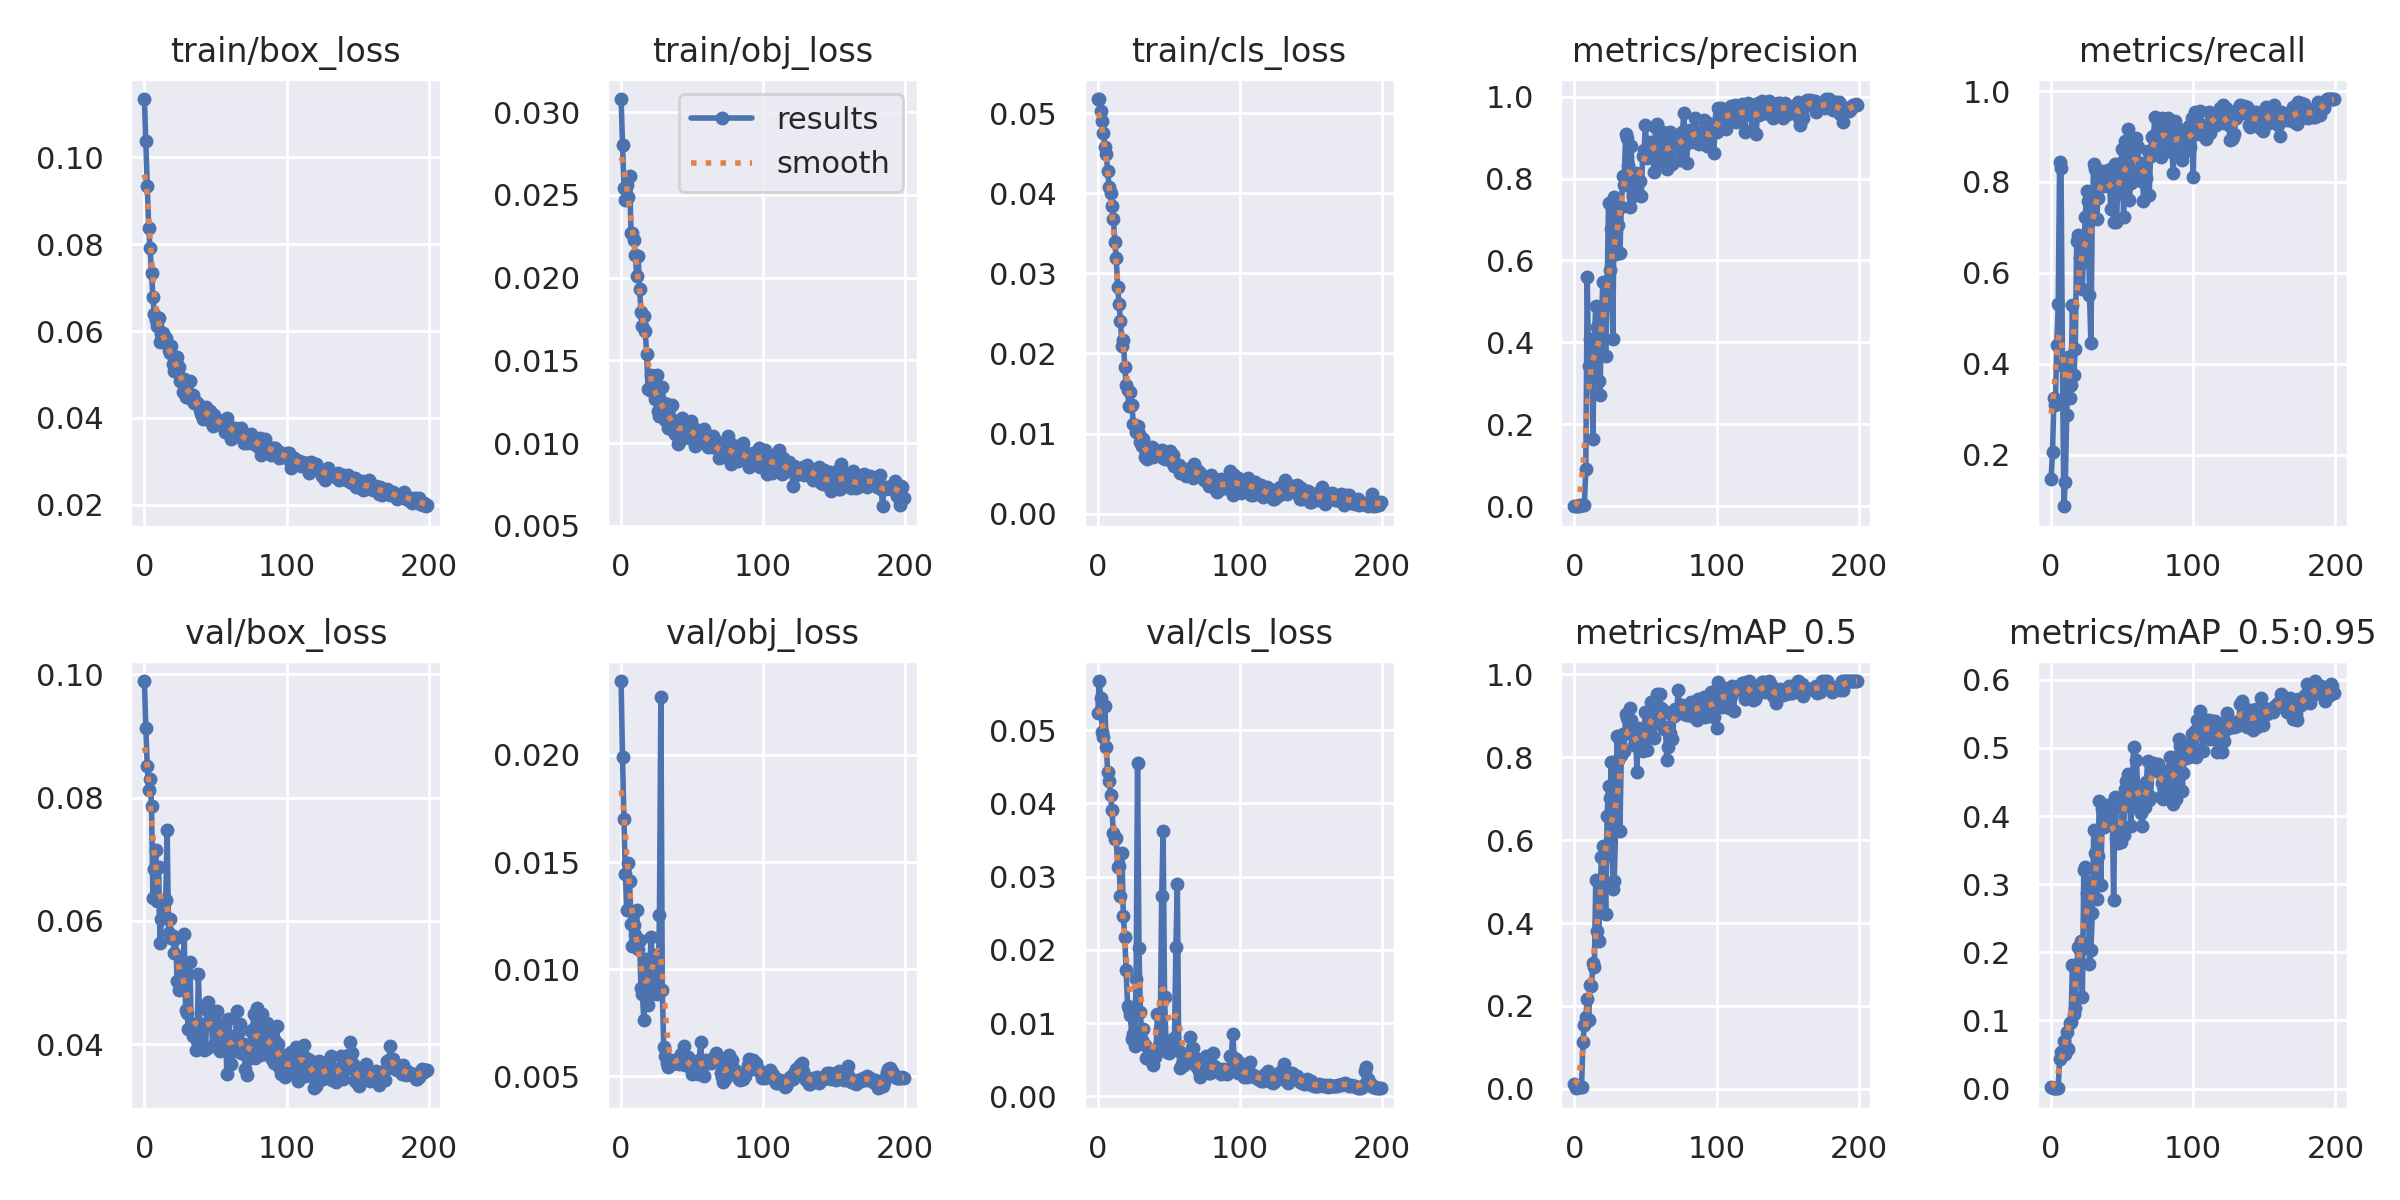

In [15]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000)  # view results.png

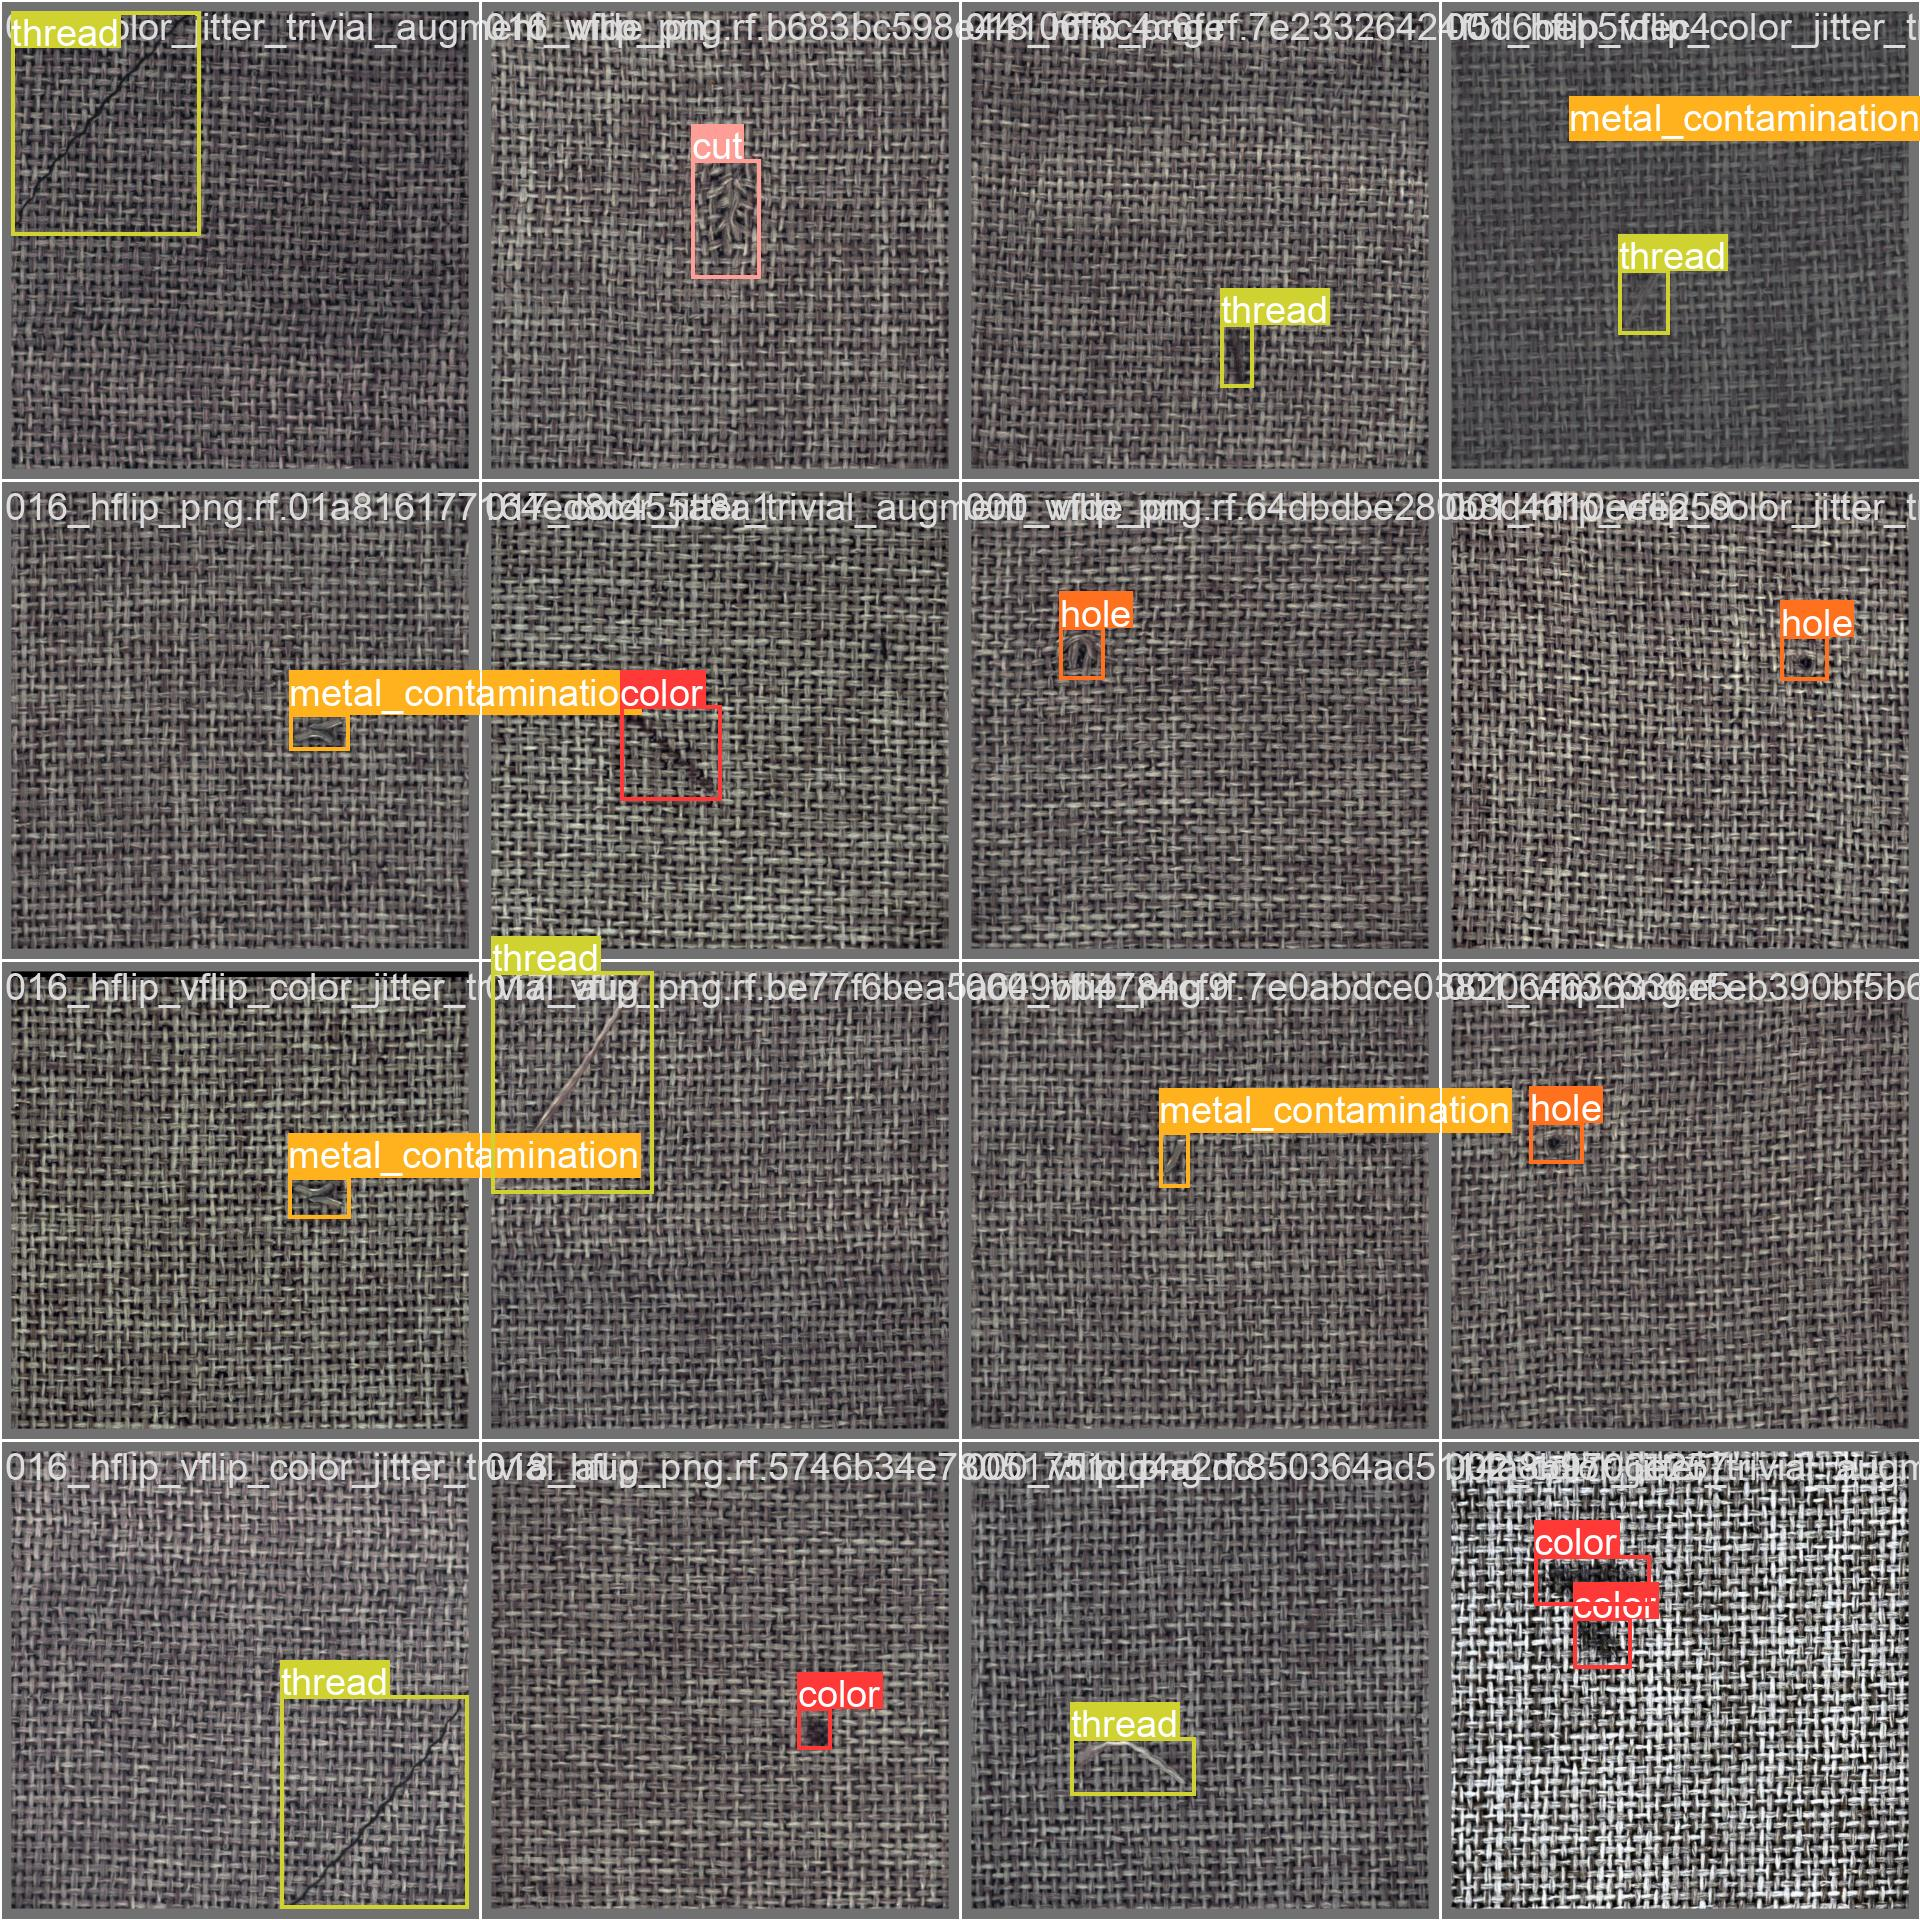

In [16]:
Image(filename="/content/yolov5/runs/train/exp/val_batch0_labels.jpg", width=900)

### Testing (Detecting)

In [22]:
%cd /content/yolov5/
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source Fabric-Defect-V3-1/test/images/

/content/yolov5
detect: weights=['runs/train/exp/weights/best.pt'], source=Fabric-Defect-V3-1/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-334-g100a423b Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/33 /content/yolov5/Fabric-Defect-V3-1/test/images/000_vflip_png.rf.909fdcd18a3c780898813daf10577b8e.jpg: 640x640 1 cut, 11.5ms
image 2/33 /content/yolov5/Fabric-Defect-V3-1/test/images/001_hflip_png.rf.d47a67aa20faa5e602dceab685b8e952.jpg: 640x640 1 

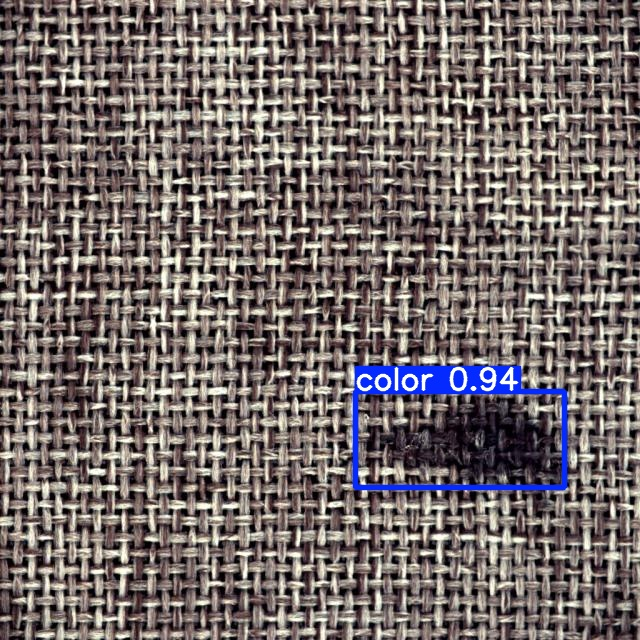

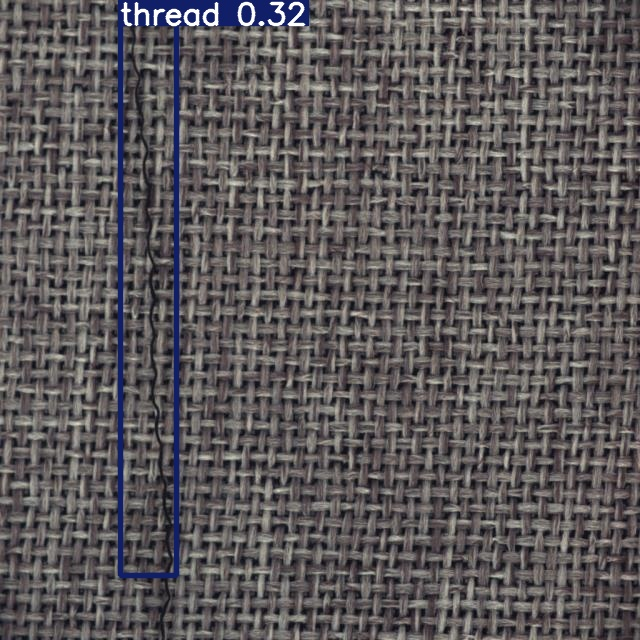

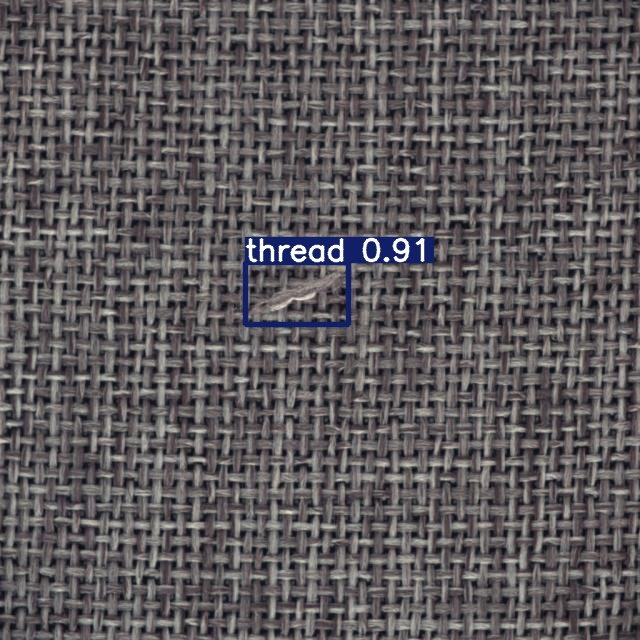

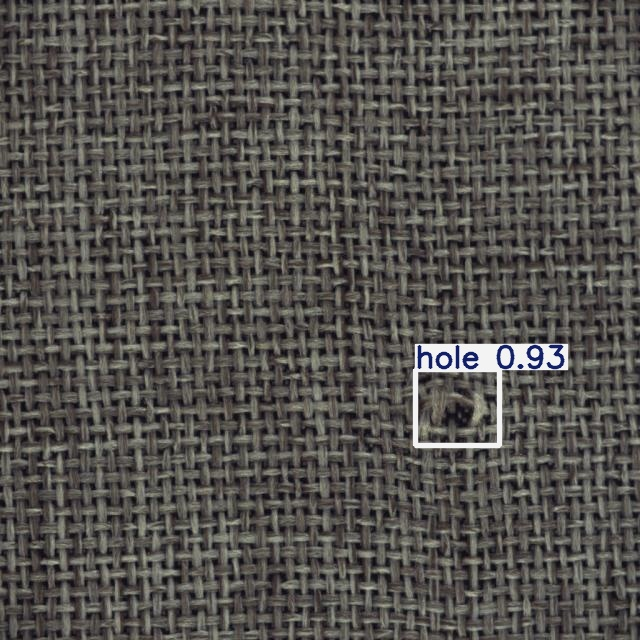

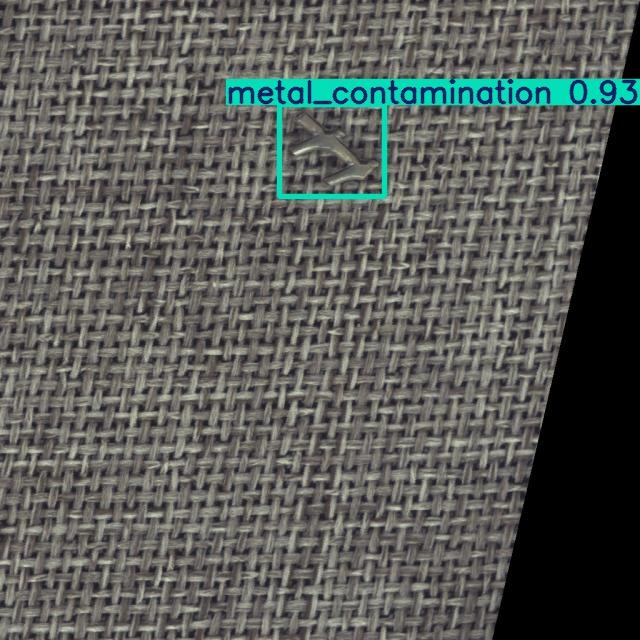

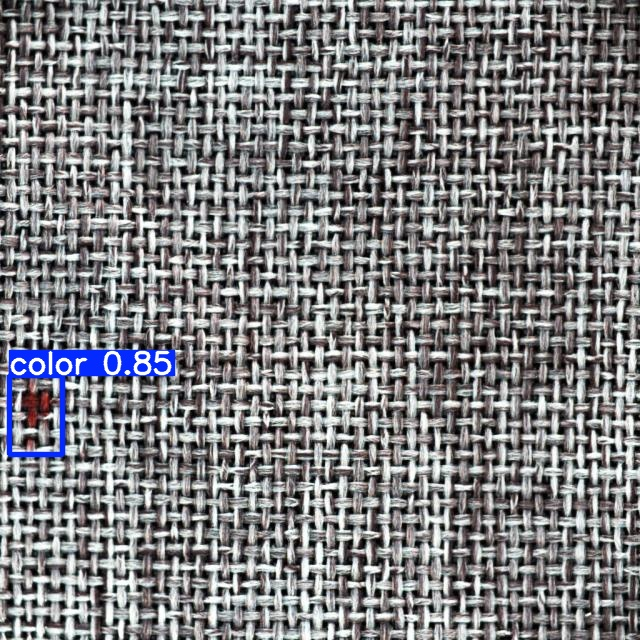

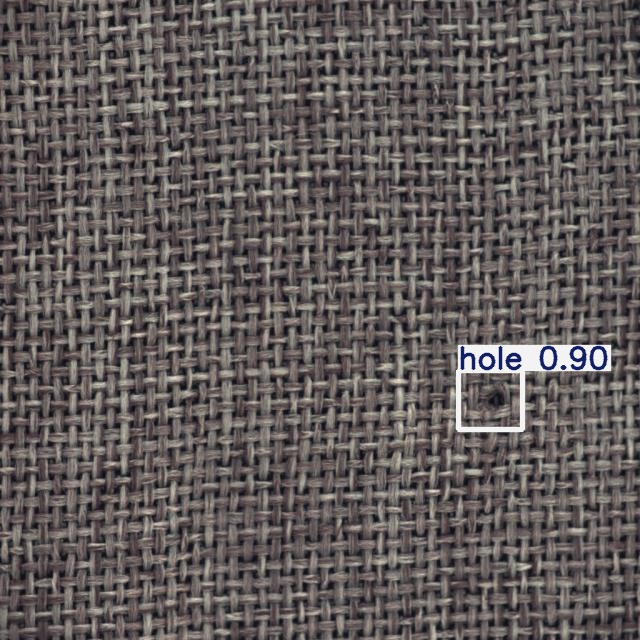

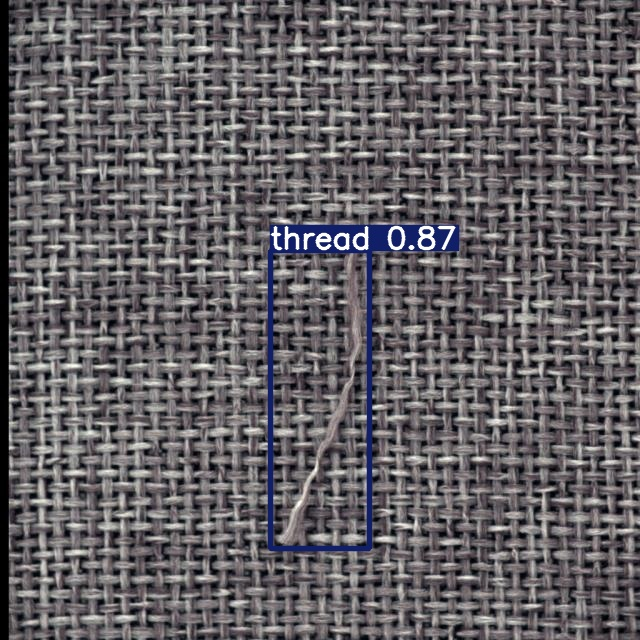

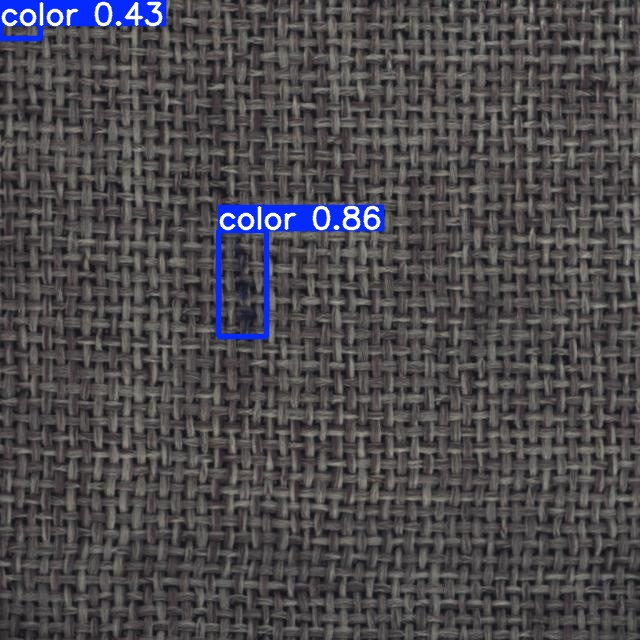

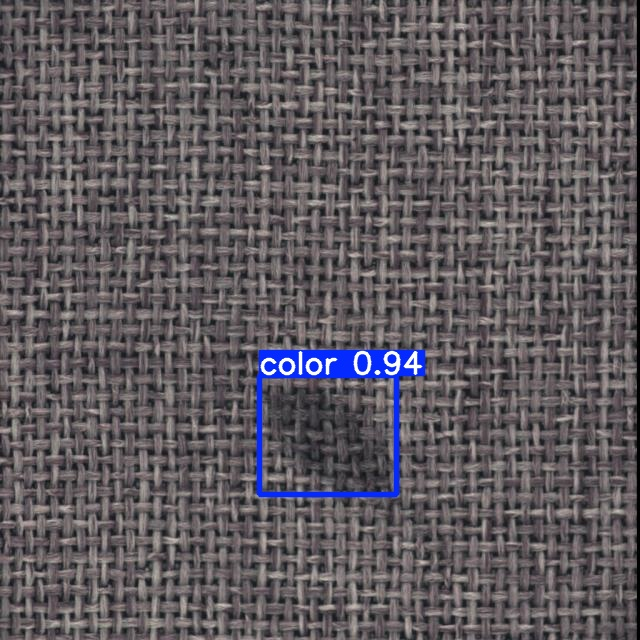

In [26]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))